Reference: https://medium.com/@sdwiulfah/having-fun-with-yolov8-how-good-your-model-in-detecting-playing-card-a468a02e4775

In [22]:
# !conda install ultralytics
# !conda install kagglehub
# !pip install torch
# !pip install torchvision
# !pip install torchaudio 


In [23]:
import kagglehub
import os
import random
import cv2
import matplotlib.pyplot as plt
import torch
from ultralytics import YOLO
%matplotlib inline

print(torch.cuda.is_available())

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)} is available.")
else:
    print("No GPU available. Training will run on CPU.")

False
No GPU available. Training will run on CPU.


In [24]:
# Download latest version
path = kagglehub.dataset_download("andy8744/playing-cards-object-detection-dataset")
print("Path to dataset files:", path)

# Define the paths to the train, valid and test directories
train_images =  path + "\\train\\images"
train_labels = path + "\\train\\labels"

valid_images = path + "\\valid\\images"
valid_labels = path + "\\valid\\labels"

test_images = path + "\\test\\images"
test_labels = path + "\\test\\labels"

yaml_path = path + "\\data.yaml"

Path to dataset files: C:\Users\soham\.cache\kagglehub\datasets\andy8744\playing-cards-object-detection-dataset\versions\4


In [25]:
# Define the labels
classes = ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']

Idx2Label = {idx: label for idx, label in enumerate(classes)}
Label2Index = {label: idx for idx, label in Idx2Label.items()}

In [26]:
def visualize_image_with_annotation_bboxes(image_dir, label_dir):
    # Get list of all the image files in the directory
    image_files = sorted(os.listdir(image_dir))

    # Choose 12 random image files from the list
    sample_image_files = random.sample(image_files, 12)

    # Set up the plot
    fig, axs = plt.subplots(4, 3, figsize=(15, 20))

    # Loop over the random images and plot the bounding boxes
    for i, image_file in enumerate(sample_image_files):
        row = i // 3
        col = i % 3

        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load the labels for this image
        label_path = os.path.join(label_dir, image_file[:-4] + '.txt')
        f = open(label_path, 'r')

        # Loop over the labels and plot the bounding boxes
        for label in f:
            class_id, x_center, y_center, width, height = map(float, label.split())
            h, w, _ = image.shape
            x_min = int((x_center - width/2) * w)
            y_min = int((y_center - height/2) * h)
            x_max = int((x_center + width/2) * w)
            y_max = int((y_center + height/2) * h)
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, Idx2Label[int(class_id)], (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

        axs[row, col].imshow(image)
        axs[row, col].axis('off')

    plt.show()

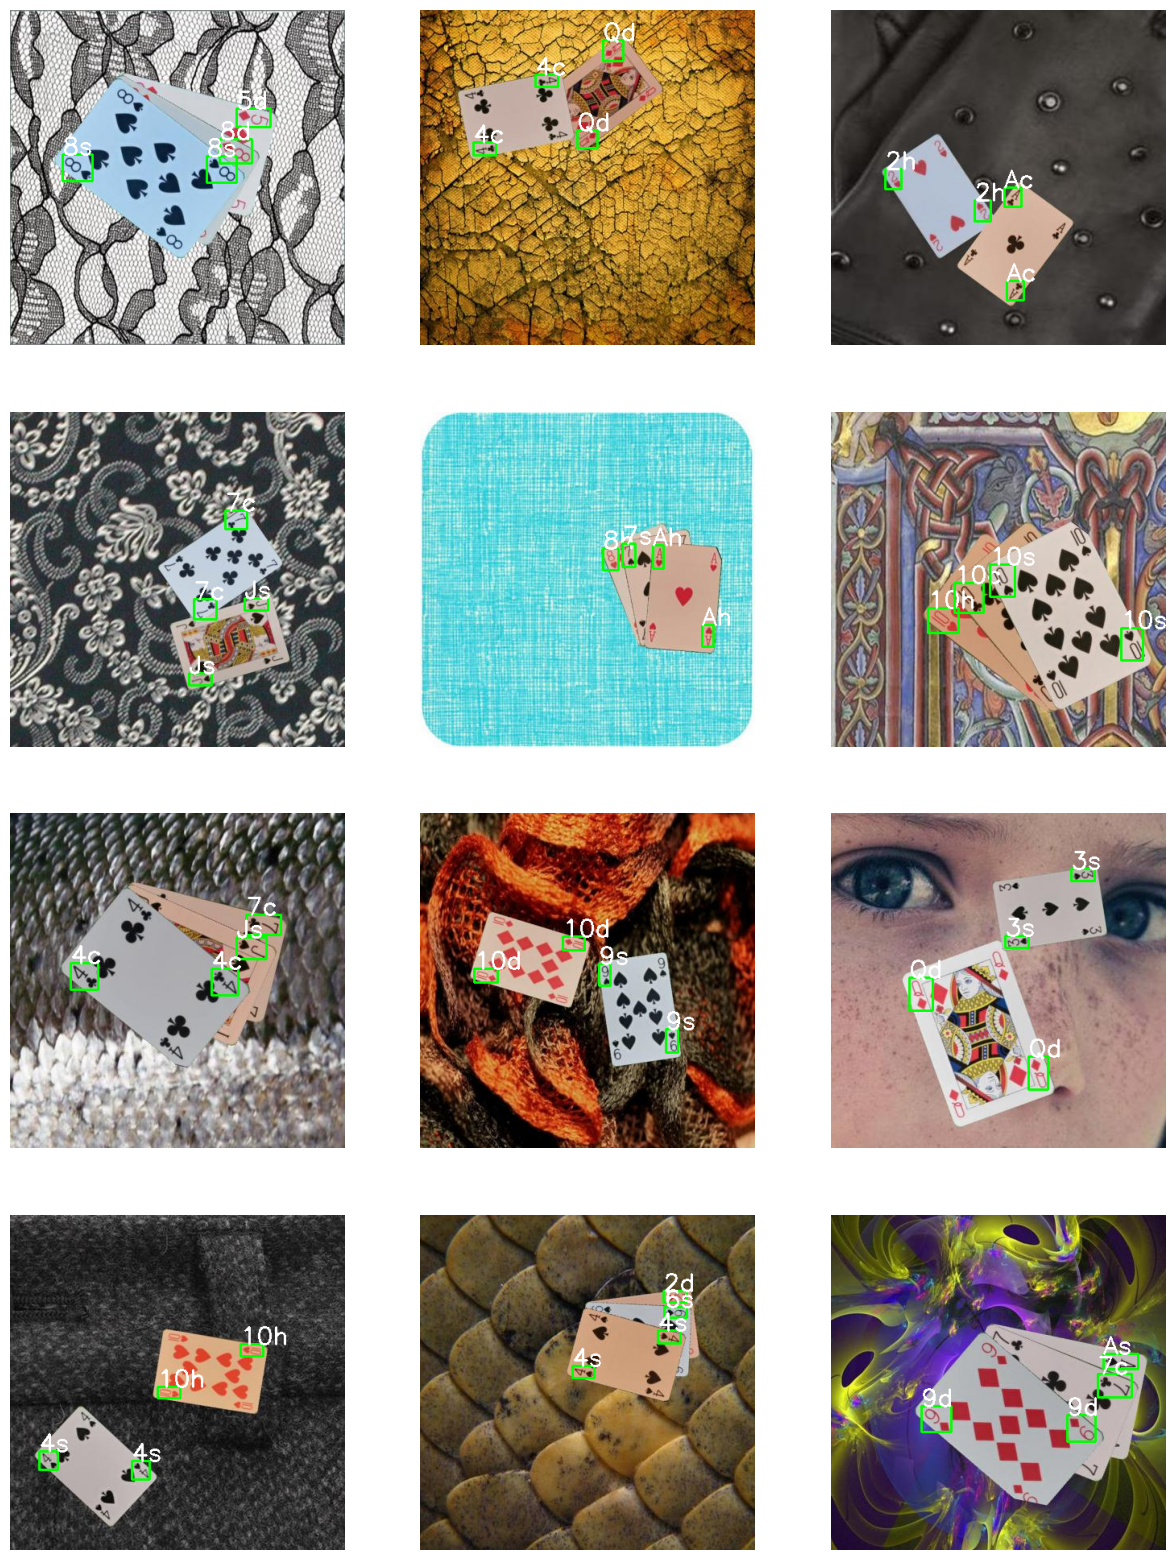

In [27]:
visualize_image_with_annotation_bboxes(train_images, train_labels)

In [28]:
# Read a image by path
image_path = os.path.join(train_images, os.listdir(train_images)[-1])
image = cv2.imread(image_path)

# Get the size of the image
height, width, channels = image.shape
print('The image has dimensions {}x{} and {} channels'.format(height, width, channels))

The image has dimensions 416x416 and 3 channels


In [29]:
# Load a pretrained nano model
model = YOLO('yolov8n.pt')

# free up GPU memory
torch.cuda.empty_cache()

# Training the model
results = model.train(
    data= yaml_path,
    epochs = 25,
    imgsz = (height, width, channels),
    seed = 42,
    batch = 8,
    workers = 4,
    patience = 5,
    name = 'yolov8n_custom')

New https://pypi.org/project/ultralytics/8.3.36 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.28  Python-3.10.5 torch-2.5.1+cpu CPU (Intel Core(TM) i7-8665U 1.90GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\soham\.cache\kagglehub\datasets\andy8744\playing-cards-object-detection-dataset\versions\4\data.yaml, epochs=25, time=None, patience=5, batch=8, imgsz=(416, 416, 3), save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolov8n_custom2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False,

train: Scanning C:\Users\soham\.cache\kagglehub\datasets\andy8744\playing-cards-object-detection-dataset\versions\4\train\labels.cache... 14000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14000/14000 [00:00<?, ?it/s]
val: Scanning C:\Users\soham\.cache\kagglehub\datasets\andy8744\playing-cards-object-detection-dataset\versions\4\valid\labels.cache... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:00<?, ?it/s]

Plotting labels to runs\detect\yolov8n_custom2\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\yolov8n_custom2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.397      4.502     0.9638         53        416: 100%|██████████| 1750/1750 [40:22<00:00,  1.38s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [04:33<00:00,  1.10s/it]


                   all       4000      15159     0.0513      0.146     0.0409     0.0324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G     0.9643      3.005     0.8515         51        416: 100%|██████████| 1750/1750 [38:15<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [04:43<00:00,  1.13s/it]


                   all       4000      15159      0.151      0.391      0.166      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G     0.8698      2.439     0.8399         38        416: 100%|██████████| 1750/1750 [39:03<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [04:09<00:00,  1.00it/s]


                   all       4000      15159      0.313      0.573      0.373      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G     0.8117      2.015      0.834         73        416: 100%|██████████| 1750/1750 [35:38<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [03:57<00:00,  1.05it/s]


                   all       4000      15159      0.498      0.679      0.602      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      0.771      1.699     0.8285         47        416: 100%|██████████| 1750/1750 [35:41<00:00,  1.22s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [03:49<00:00,  1.09it/s]


                   all       4000      15159       0.62      0.751      0.725      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G     0.7501      1.535     0.8262         35        416:  23%|██▎       | 397/1750 [08:38<29:26,  1.31s/it]  


KeyboardInterrupt: 

In [21]:
# Loading the best performing model
model = YOLO('yolov8n_custom.pt')

# Evaluating the model on test dataset
metrics = model.val(conf=0.25, split='test')

FileNotFoundError: [Errno 2] No such file or directory: 'yolov8n_custom_final.pt'

In [ ]:
# Function to perform detections with trained model
def predict_detection(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Pass the image through the detection model and get the result
    detect_result = model(image)

    # Plot the detections
    detect_image = detect_result[0].plot()

    # Convert the image to RGB format
    detect_image = cv2.cvtColor(detect_image, cv2.COLOR_BGR2RGB)

    return detect_image

In [ ]:
# Get list of all the image files in the test directory
image_files = sorted(os.listdir(test_images))

# Choose 12 random image files from the list
sample_image_files = random.sample(image_files, 12)

# Set up the plot
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# Loop over the random images and plot the detections of the trained model
for i, image_file in enumerate(sample_image_files):
    row = i // 3
    col = i % 3

    # Load the current image and run object detection
    image_path = os.path.join(test_images, image_file)
    detect_image = predict_detection(image_path)

    axs[row, col].imshow(detect_image)
    axs[row, col].axis('off')

plt.show()